In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:

TipoCC = {'A':'Temp', 'B':'Flujo', 'C':'Temp', 'D':'Temp'}
# Asigno los valores de las condiciones de contorno
CC = {'A':75, 'B':0, 'C':50, 'D':100}

In [3]:
Nx = 100
Ny = 100
N = Nx*Ny

In [4]:
class Chapa:

    def __init__(self, Nx, Ny):
        
        self.Nx = Nx
        self.Ny = Ny
        self.N = Nx*Ny
        
        # Defino "beta = Nx/Ny".
        self.beta = Nx/Ny

        # Otra manera de tomar las condiciones de contorno en los BORDES, definiéndolos como vectores.
        self.bordeB = np.linspace(0, self.Nx - 1, self.Nx).astype(int)
        self.bordeD = np.linspace(self.N - self.Nx, self.N - 1, self.Nx).astype(int)
        self.bordeA = np.linspace(0, self.N - self.Nx, self.Ny).astype(int)
        self.bordeC = np.linspace(self.Nx - 1, self.N - 1, self.Ny).astype(int)
        
    def makematrix(self, CC, TipoCC):
        self.CC = CC
        self.TipoCC = TipoCC
        
        # Esto que voy a hacer NO SE HACE, debería cambiar todos los nx, ny y beta de la función por los que llevan self.
        Nx = self.Nx
        Ny = self.Ny
        N = self.N
        beta = self.beta
        
        # Teniendo en cuenta que la matriz tendrá "1" en la diagonal y el resto "0" cuando corresponde a un "k" de borde, 
        # defino la matriz "M" como sigue:
        M = np.eye(N)
        # Defino vector "b" como vector nulo, porque en un problema general la mayoría de las ecuaciones están igualadas a "0",
        # salvo cuando se impone alguna condición de borde.
        b = np.zeros([N, 1])
        
        for k in range(N):
            
            # Vértice inf. izq. (A-B)
            if k==0:
                if self.TipoCC['A']=='Temp' and self.TipoCC['B']=='Flujo':
                    # Dejo el valor de temperatura.
                    b[k] = CC['A']
                elif self.TipoCC['A']=='Flujo' and self.TipoCC['B']=='Temp':
                    # Dejo el valor de temperatura.
                    b[k] = CC['B']
                else:
                    # Ambos bordes tienen temperatura. Hago el promedio.
                    b[k] = (CC['A']+CC['B'])/2
            
            # Vértice inf. der. (B-C)
            elif k==Nx-1:
                if self.TipoCC['B']=='Temp' and self.TipoCC['C']=='Flujo':
                    # Dejo el valor de temperatura.
                    b[k] = CC['B']
                elif self.TipoCC['B']=='Flujo' and self.TipoCC['C']=='Temp':
                    # Dejo el valor de temperatura.
                    b[k] = CC['C']
                else:
                    # Ambos bordes tienen temperatura. Hago el promedio.
                    b[k] = (CC['B']+CC['C'])/2
            
            # Vértice sup. der. (C-D)
            elif k==N-1:
                if self.TipoCC['C']=='Temp' and self.TipoCC['D']=='Flujo':
                    # Dejo el valor de temperatura.
                    b[k] = CC['C']
                elif self.TipoCC['C']=='Flujo' and self.TipoCC['D']=='Temp':
                    # Dejo el valor de temperatura.
                    b[k] = CC['D']
                else:
                    # Ambos bordes tienen temperatura. Hago el promedio.
                    b[k] = (CC['C']+CC['D'])/2
            
            # Vértice sup. izq. (D-A)
            elif k==N-Nx:
                if self.TipoCC['D']=='Temp' and self.TipoCC['A']=='Flujo':
                    # Dejo el valor de temperatura.
                    b[k] = CC['D']
                elif self.TipoCC['D']=='Flujo' and self.TipoCC['A']=='Temp':
                    # Dejo el valor de temperatura.
                    b[k] = CC['A']
                else:
                    # Ambos bordes tienen temperatura. Hago el promedio.
                    b[k] = (CC['D']+CC['A'])/2
            
            # Borde izq. (A)
            elif k%Nx==0:
                if self.TipoCC['A']=='Temp':
                    b[k] = CC['A']
                elif self.TipoCC['A']=='Flujo':
                    M[k,k] = -2*(1+beta**2)
                    M[k,k+1] = 2
                    M[k,k-Nx] = beta**2
                    M[k,k+Nx] = beta**2
            
            # Borde inf. (B)
            elif k<Nx-1:
                if self.TipoCC['B']=='Temp':
                    b[k] = CC['B']
                elif self.TipoCC['B']=='Flujo':
                    M[k,k] = -2*(1+beta**2)
                    M[k,k-1] = 1
                    M[k,k+1] = 1
                    M[k,k+Nx] = 2*beta**2
            
            # Borde der. (C)
            elif (k+1)%Nx==0:
                if self.TipoCC['C']=='Temp':
                    b[k] = CC['C']
                elif self.TipoCC['C']=='Flujo':
                    M[k,k] = -2*(1+beta**2)
                    M[k,k-1] = 2
                    M[k,k-Nx] = beta**2
                    M[k,k+Nx] = beta**2
            
            # Borde sup. (D)
            elif k>Nx*(Ny-1)-1:
                if self.TipoCC['D']=='Temp':
                    b[k] = CC['D']
                elif self.TipoCC['D']=='Flujo':
                    M[k,k] = -2*(1+beta**2)
                    M[k,k-1] = 1
                    M[k,k+1] = 1
                    M[k,k-Nx] = 2*beta**2
            
            # Nodos internos
            else:
                M[k,k] = -2*(1+beta**2)
                M[k,k-1] = 1
                M[k,k+1] = 1
                M[k,k-Nx] = beta**2
                M[k,k+Nx] = beta**2
        
        self.M = M
        self.b = b
        return M, b

In [6]:

Chapa = Chapa(Nx, Ny)
M, b = Chapa.makematrix(CC, TipoCC)

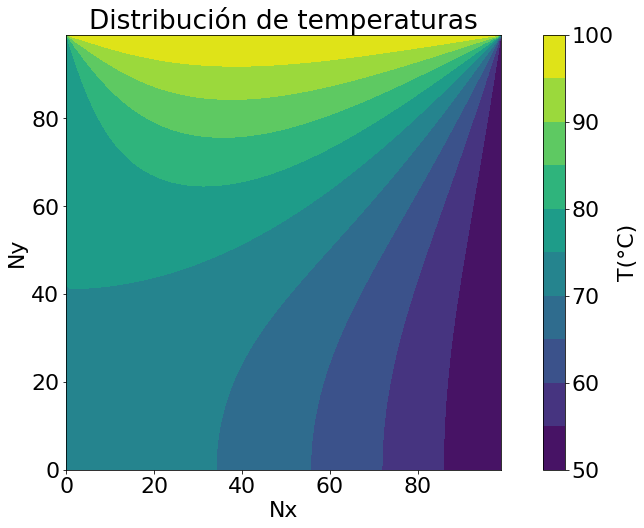

In [7]:
# Resuelvo el sistema de ecuaciones "MT=b".
T = np.linalg.solve(M, b)

# Convierto el vector de temperaturas "T" en una matriz de tamaño "Nx*Ny".
T_matriz = T.reshape(Nx, Ny) 
# Configuro el tamaño de los gráficos para que sean más grandes de aquí en adelante.
plt.rc('figure', figsize=(15,8))
plt.rc('font',size=22)
# Defino los valores de temperatura a graficar que irán desde la mínima hasta la máxima temperatura almacenadas en "CC".
lvl = np.linspace(50, 100, 11)
mapable = plt.contourf(T_matriz, levels=lvl)
plt.gca().set_aspect('equal')
cbar = plt.colorbar(mapable)
cbar.set_label('T(°C)')
plt.title('Distribución de temperaturas')
plt.xlabel('Nx')
plt.ylabel('Ny')
plt.show()